## Project: Wrangle and Analyze We Rate Dogs Twitter Data

In [1]:
# import standard libs
from pathlib import Path
import requests
import os
from dotenv import load_dotenv, find_dotenv
import tweepy
import json
import re
# import python scientific stack
import pandas as pd
import numpy as np

# import visual tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Directory and folder names for where project files and data will be stored

In [2]:
# directory path for Project_Wrangle_and_Analyze_Data
dirname = Path(r'C:\Users\rj71b\RMIT Course\Project_Wrangle_and_Analyze_Data')

# folder name for where raw data will be stored
raw_data_folder = r'data\raw'

# folder name for where processed (ie cleaned) data will be stored
processed_data_folder = 'data\processed'

# folder to save reports
reports_folder = 'reports'

# file name for WeRateDogs Twitter archive
twitter_archive = 'twitter-archive-enhanced.csv'

## Gathering Data for Project

#### WeRateDogs Twitter Archive

In [3]:
# read csv file into pandas dataframe
df_archive = pd.read_csv(dirname / raw_data_folder / twitter_archive, 
                         na_values='None',                            # set 'None' as nan
                         dtype={'tweet_id':str})                      # convert tweet_id to str

#### Tweet image predictions

In [4]:
# folder name is raw
if not os.path.exists(dirname / raw_data_folder):
    os.makedirs(dirname / raw_data_folder)

In [5]:
#  tweet image predictions url link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
with open(os.path.join(dirname / raw_data_folder,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
df_images = pd.read_csv(dirname / raw_data_folder / 'image-predictions.tsv',
                            sep='\t')




#### Query Twitter Data

In [8]:
# Twitter API authentication keys and secrets stored in .env file  
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

# assign to variable names to use in API
consumer_key = os.environ.get("CONSUMER_KEY") 
consumer_secret = os.environ.get("CONSUMER_SECRET")
access_token = os.environ.get("ACCESS_TOKEN")
access_secret = os.environ.get("ACCESS_SECRET")

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Resources:

- [Reading and Writing JSON to a File in Python](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)
- [Replace value based on condition with np.where](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.where.html)
- [How to strip html tags from a string in Python](https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44)

In [ ]:
errors = {}
data = []
tweet_id_list = df_archive.tweet_id.to_list()
for tweet_count, tweet_id in enumerate(tweet_id_list, 1):
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        json_content = tweet._json
        data.append(json_content)
        with open(os.path.join(dirname, raw_data_folder, 'tweet_json.txt'), 'w') as outfile:
            json.dump(data, outfile)

    except tweepy.TweepError as e:
        print(str(tweet_count) + ":" + str(tweet_id) +  ":" + str(e))
        errors[str(tweet_count) + ":" + str(tweet_id)] = e.response.json()['errors'][0]['message']
        with open(os.path.join(dirname, raw_data_folder, 'status_error.txt'), 'w') as errorfile:
                json.dump(errors, errorfile)
        continue
        

### Read in json file

In [234]:
# empty list to read json data into and convert to pandas dataframe
df_list = []

with open(os.path.join(dirname, raw_data_folder, 'tweet_json.txt')) as json_file:
    data = json.load(json_file)
    for tweet in data:
            df_list.append({'tweet_id': tweet['id'],
                            'retweet_count' : tweet['retweet_count'],
                            'favorite_count' : tweet['favorite_count']})

In [235]:
df_tweet = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assess Project Data
#### WeRateDogs Twitter archive

In [236]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [237]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(2), object(1

In [238]:
df_archive.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [239]:
df_archive.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 956, dtype: int64

In [240]:
# Number of records where doggo, floofer, pupper & puppo columns contain more than one stage for dogs
df_archive.loc[(df_archive[['doggo', 'floofer','pupper', 'puppo']].notna()).sum(axis=1)>1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,NaN,NaN,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,NaN,NaN
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,NaN,pupper,NaN
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,NaN,pupper,NaN
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,NaN,pupper,NaN
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN


In [241]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [242]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [243]:
df_archive[['text','name']].sample(10)

,text,name
1681,This is Jimothy. He's a Trinidad Poliwhirl. Fa...,Jimothy
1043,RT @dog_rates: Extremely intelligent dog here....,NaN
664,RT @dog_rates: This is Happy. He's a bathtub r...,Happy
1307,This is Finnegus. He's trapped in a snow globe...,Finnegus
1859,Meet Reggie. He's going for the world record. ...,Reggie
2214,It is an honor to rate this pup. He is a Snork...,NaN
1799,Here we see a Byzantine Rigatoni. Very aerodyn...,NaN
466,This is Tebow. He kindly requests that you put...,Tebow
1935,This pup is sad bc he didn't get to be the toy...,NaN
389,This is Pilot. He has mastered the synchronize...,Pilot


In [245]:
# examine single tweet. Note https tag at end
df_archive.text[2328]

'Oh goodness. A super rare northeast Qdoba kangaroo mix. Massive feet. No pouch (disappointing). Seems alert. 9/10 https://t.co/Dc7b0E8qFE'

#### tweet image predictions

In [246]:
df_images.head()    

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [247]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id        2075 non-null int64
jpg_url         2075 non-null object
img_num         2075 non-null int64
prediction_1    2075 non-null object
confidence_1    2075 non-null float64
dog_1           2075 non-null bool
prediction_2    2075 non-null object
confidence_2    2075 non-null float64
dog_2           2075 non-null bool
prediction_3    2075 non-null object
confidence_3    2075 non-null float64
dog_3           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### retweet count and favorite ("like") count

In [248]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7891,36987
1,892177421306343426,5862,31839
2,891815181378084864,3868,23977
3,891689557279858688,8052,40318
4,891327558926688256,8723,38530


In [249]:
df_tweet.tail()

,tweet_id,retweet_count,favorite_count
2328,666049248165822465,41,99
2329,666044226329800704,135,279
2330,666033412701032449,43,118
2331,666029285002620928,45,122
2332,666020888022790149,478,2472


In [250]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2779.372910,7716.224175
std,6.820607e+16,4704.403476,11978.037015
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,559.000000,1338.000000
50%,7.184547e+17,1299.000000,3359.000000
75%,7.986654e+17,3231.000000,9471.000000
max,8.924206e+17,79857.000000,159859.000000


In [251]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


## Data Quality Issues
#### df_archive
- df_tweet_archive contains tweets without images
- timestamp column is in wrong format.
- duplicated data indicated by retweeted_status_id 181 non null values
- not all dogs have a name. Dogs without names are indicated as None. Need to change to NAN. Also lower case such as "a" as dog name need to be changed to NAN
- text column in df_archive_copy contains text and hyper link at the end
- source column contains hyper links
- multiple denominator values greater than or less than ten
- several records contain more than one dog stage. ie pupper and doggo for the one dog. 
- drop columns 

#### df_image_copy
- rename ambiguous column names with more meaningful names



## Data Tidyness Issues
#### df_archive
- combine four dog stage columns into one called stage
- merge df_archive_copy and df_tweet_copy 

#### df_image_copy
- convert df_images from wide format to long


## Clean


In [252]:
# make copy of all dataframes to clean
df_archive_copy = df_archive.copy()
df_images_copy = df_images.copy()
df_tweet_copy = df_tweet.copy()
df_archive_copy.shape, df_images_copy.shape, df_tweet_copy.shape


((2356, 17), (2075, 12), (2333, 3))

#### Remove duplicated rows

In [254]:
df_archive_copy = df_archive_copy[df_archive_copy.retweeted_status_id.isnull()]


#### Test

In [255]:
# test
len(df_archive_copy[df_archive_copy.retweeted_status_id.isnull()==False])

0

#### Drop all rows in df_archive_copy where there are no url images

In [256]:
df_archive_copy.dropna(subset=['expanded_urls'], inplace=True)

#### Test

In [257]:
len(df_archive_copy[df_archive_copy.expanded_urls.isnull()==True])

0

#### Change all denominator values to 10

In [258]:
# change denominator values to numpy array to use in np.where
a = np.array(df_archive_copy['rating_denominator'].values.tolist())
# using numpy.where reurn 10 when condition not met
df_archive_copy['rating_denominator'] = np.where(a != 10, 10, a)


#### Test

In [259]:
df_archive_copy.rating_denominator.value_counts()

10    2117
Name: rating_denominator, dtype: int64

#### Remove hyperlink from text column

In [260]:
df_archive_copy['text'] = df_archive_copy['text'].apply(lambda x : x.split('https')[0])

#### Test

In [261]:
df_archive_copy['text'][1789]

'Not much to say here. I just think everyone needs to see this. 12/10 '

#### Remove href tags from source column

In [262]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# apply remove_html_tags function to source column
df_archive_copy['source'] = df_archive_copy['source'].apply(lambda x: remove_html_tags(x))

#### Test

In [263]:
df_archive_copy['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### Replace errononeous dog names with NAN

In [264]:
#  (r'^[a-z]+$'  regex pattern for lower case

df_archive_copy.name = df_archive_copy.loc[:, 'name'].replace(to_replace=r'^[a-z]+$', value=np.nan, regex=True)

#### Test

In [271]:
# No lowercase letters lik a and non names
df_archive_copy.name.value_counts(ascending=True)

Baloo       1
Shaggy      1
Mimosa      1
Rambo       1
Ricky       1
           ..
Penny       9
Cooper     10
Oliver     10
Lucy       11
Charlie    11
Name: name, Length: 930, dtype: int64

#### Change dog stage to one where there are multiple in each record

In [272]:
# Change values to None where two stages occur in one record
# Visually assessing it seems this occurs when there are two dogs in the tweet.
# Where this occurs for doggo and pupper I will change pupper to None. 
# The reason being the two can be used interchangeably, therefore will default to doggo

# index values for multiple doggo & pupper entries
indx = [460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]

for id in indx:
    df_archive_copy.at[id, 'pupper'] = np.nan
    
# 
df_archive_copy.at[191, 'doggo'] = np.nan

# visually assessing stage is doggo for dog at index 200
df_archive_copy.at[200, 'floofer'] = np.nan

#### Test

In [273]:
(df_archive_copy[(df_archive_copy.doggo == np.nan) & (df_archive_copy.pupper == np.nan)]).index

Int64Index([], dtype='int64')

#### df_archive multiple columns for dog stage. Only needs to be  one

In [274]:
def dog_stage(row):
    """fn: funcion to find dog stage in each record"""

    if row['doggo'] == 'doggo':
        return 'doggo'
    if row['floofer'] == 'floofer':
        return 'floofer'
    if row['pupper'] == 'pupper':
        return 'pupper'
    if row['puppo'] == 'puppo':
        return 'puppo'
    return np.nan

# use apply function to apply dog_stage() function. Assign results to new column called stage
df_archive_copy['stage'] = df_archive_copy.apply(lambda row: dog_stage(row), axis=1)

#### Test

In [275]:
df_archive_copy.stage.value_counts()

pupper     222
doggo       83
puppo       24
floofer      9
Name: stage, dtype: int64

In [276]:
df_archive_copy[['doggo', 'floofer','pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
doggo,83.0,NaN,NaN,NaN
floofer,NaN,9.0,NaN,NaN
pupper,NaN,NaN,222.0,NaN
puppo,NaN,NaN,NaN,24.0


#### Merge df_archive_copy and df_images_copy

In [277]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [278]:
# change dtype of tweet_id column to str before merging
# df_archive_copy.tweet_id = df_archive_copy.tweet_id.astype(str)
df_tweet_copy.tweet_id = df_tweet_copy.tweet_id.astype(str)
df_tweet_copy.tweet_id.head()


0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [279]:
twitter_archive_master = pd.merge(df_archive_copy, df_tweet_copy, on="tweet_id", how="inner")

In [280]:
twitter_archive_master.shape, df_tweet_copy.shape, df_archive_copy.shape

((2110, 20), (2333, 3), (2119, 18))

#### Drop unwanted columns

In [281]:
# list of columns to drop from twitter_archive_master
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id','expanded_urls', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','doggo', 'floofer', 'pupper', 'puppo']

twitter_archive_master.drop(columns_to_drop, axis=1, inplace=True)

twitter_archive_master.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,7891,36987
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,5862,31839
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,3868,23977


### Clean df_image

### The image prediction dataframe is in wide format. Need to convert to long format

In [282]:
df_images.head(2)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [283]:
# use pandas wide_to_long function to get each variable in long format
# change col names
col_names = ['tweet_id', 'jpg_url', 'img_num',
            'prediction_1', 'confidence_1', 'dog_1',
             'prediction_2', 'confidence_2', 'dog_2',
             'prediction_3', 'confidence_3', 'dog_3']
df_images.columns = col_names

In [284]:
long = pd.wide_to_long(df_images, stubnames = ['prediction','confidence', 'dog'],
                       i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_number', sep='_')

### Test

In [286]:
long

prediction  \
tweet_id           jpg_url                                         img_num prediction_number                           
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1                  Welsh_springer_spaniel   
                                                                           2                                  collie   
                                                                           3                       Shetland_sheepdog   
666029285002620928 https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg 1       1                                 redbone   
                                                                           2                      miniature_pinscher   
...                                                                                                              ...   
892177421306343426 https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg 1       2                                Pekinese   
                                                                           3                                papillon   
892420643555336193 https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg 1       1                                  orange   
                                                                           2                                   bagel   
                                                                           3                                  banana   

                                                                                              confidence  \
tweet_id           jpg_url                                         img_num prediction_number               
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1                    0.465074   
                                                                           2                    0.156665   
                                                                           3                    0.061428   
666029285002620928 https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg 1       1                    0.506826   
                                                                           2                    0.074192   
...                                                                                                  ...   
892177421306343426 https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg 1       2                    0.090647   
                                                                           3                    0.068957   
892420643555336193 https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg 1       1                    0.097049   
                                                                           2                    0.085851   
                                                                           3                    0.076110   

                                                                                                dog  
tweet_id           jpg_url                                         img_num prediction_number         
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1                   True  
                                                                           2                   True  
                                                                           3                   True  
666029285002620928 https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg 1       1                   True  
                                                                           2                   True  
...                                                                                             ...  
892177421306343426 https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg 1       2                   True  
                                                                           3                   True  
892420643555336193 https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg 1       1                  False  
                  

## Storing Data
**Save cleaned twitter_archive_master dataframe to csv**

In [287]:
# twitter_archive_master.csv is saved to processed folder
twitter_archive_master.to_csv(dirname / processed_data_folder /'twitter_archive_master.csv', index=False)

#### Save df_images transformed from wide to long format as images_long.csv

In [288]:
long.to_csv(dirname / processed_data_folder / 'images_long.csv', index=True)

### Analyzing and Visualizing Data 

In [10]:
# read in  cleaned twitter_archive_master.csv file to start analysis and visualisation
# here I address the data quality issue for timetamp column by setting parse_date as True
# I then set timestamp column as index to allow for timeseries plotting in pandas

df = pd.read_csv(dirname / processed_data_folder /'twitter_archive_master.csv',
                 index_col='timestamp',
                parse_dates=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2110 entries, 2017-08-01 16:23:56+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 9 columns):
tweet_id              2110 non-null int64
source                2110 non-null object
text                  2110 non-null object
rating_numerator      2110 non-null float64
rating_denominator    2110 non-null float64
name                  1384 non-null object
stage                 337 non-null object
retweet_count         2110 non-null int64
favorite_count        2110 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 164.8+ KB


#### Most tweeted dog stage

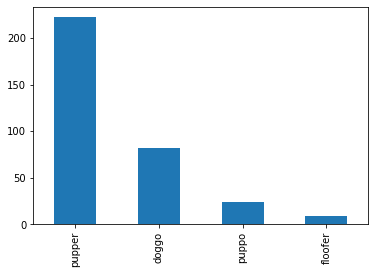

In [291]:
df.stage.value_counts().plot(kind = 'bar')

#### Top 10  dog names

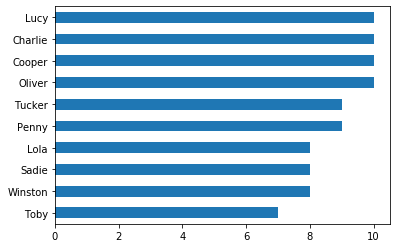

In [292]:
df.name.value_counts().head(10).sort_values().plot(kind='barh')

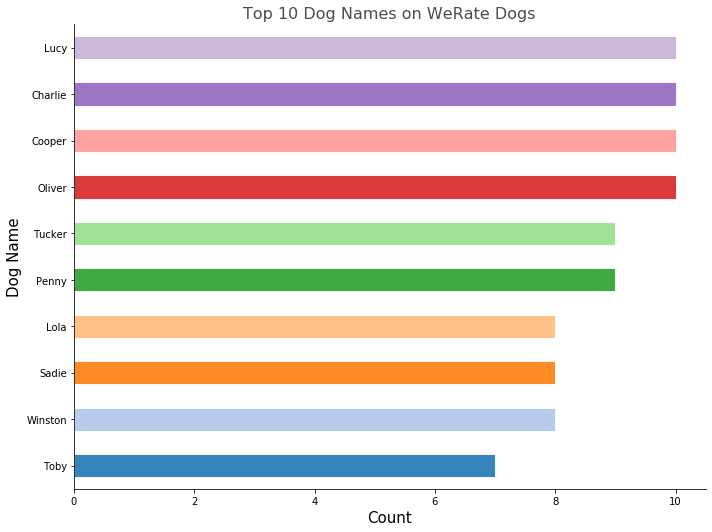

In [293]:
# Create a figure of given size
fig = plt.figure(figsize=(10,7.5))
# Add a subplot
ax = fig.add_subplot(111)
# remove right and top spines
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 
#set title
ax.set_title('Top 10 Dog Names on WeRate Dogs', fontsize = 16, alpha = 0.7)
# Plot the 'dog names' column as horizontal bar plot
df.name.value_counts().head(10).sort_values().plot(kind='barh', ax=ax, alpha=0.9, color=plt.cm.tab20(np.arange(len(df.name.value_counts().head(10).sort_values()))),
                      edgecolor='w')
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Dog Name', fontsize = 15)
plt.tight_layout()
plt.savefig(dirname / reports_folder  / 'top_10_names.png')

#### Source of Tweets

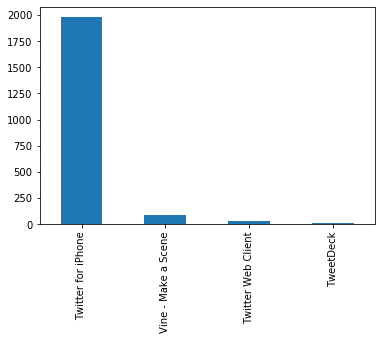

In [294]:
df.source.value_counts().plot(kind='bar')

In [295]:
df.groupby('stage')['rating_numerator'].value_counts()

stage    rating_numerator
doggo    11.0                21
         12.0                20
         13.0                20
         10.0                 9
         14.0                 8
         8.0                  3
         5.0                  1
floofer  12.0                 3
         13.0                 3
         11.0                 2
         10.0                 1
pupper   12.0                54
         11.0                52
         10.0                51
         13.0                18
         9.0                 16
         8.0                 12
         7.0                  8
         14.0                 7
         3.0                  1
         5.0                  1
         6.0                  1
         27.0                 1
puppo    13.0                10
         12.0                 7
         10.0                 3
         11.0                 2
         9.0                  1
         14.0                 1
Name: rating_numerator, dtype: int64

### Analyze retweet_count and favourite_count
> A Retweet is a re-posting of a Tweet. Twitter's Retweet feature helps you and others quickly share that Tweet with all of your followers. You can Retweet your own Tweets or Tweets from someone else.

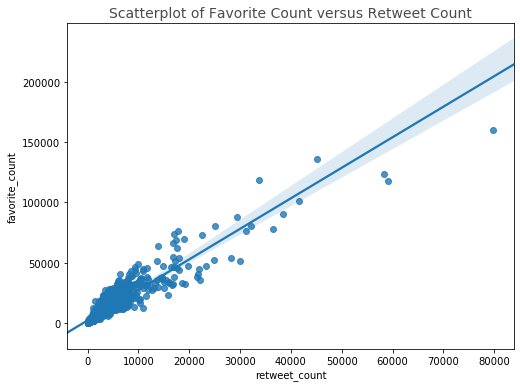

In [296]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x='retweet_count', y='favorite_count',data=df, ax=ax)
#set title
ax.set_title('Scatterplot of Favorite Count versus Retweet Count', fontsize = 14, alpha = 0.7)
plt.savefig(dirname / reports_folder / 'correlation.png');

In [297]:
df[['retweet_count', 'favorite_count']].corr(method='pearson').reset_index(drop=True)

,retweet_count,favorite_count
0,1.000000,0.926747
1,0.926747,1.000000


### WeRateDogs tweeting trend

C:\Users\rj71b\Anaconda3\envs\RMIT\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


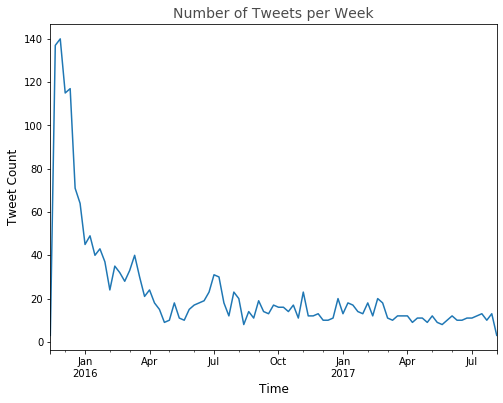

In [298]:
fig, ax = plt.subplots(figsize=(8,6))

df.tweet_id.resample("W").count().plot(ax=ax)
#set title
ax.set_title('Number of Tweets per Week', fontsize = 14, alpha = 0.7)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Tweet Count', fontsize = 12)
plt.savefig(dirname / reports_folder / 'tweet_count.png');

In [299]:
# average tweets per week after March 2016
df.tweet_id.resample("W").count()['2016-03-27':].mean()

14.26388888888889

## favorite_count and retweet_count per week

In [300]:
# resample favorite_count by week and sum. Exclude first week and last week as they dont seem to have full values
weekly_favorite = df.favorite_count.resample('W').sum()[1:-1]
# resample retweet_count by week and sum. Exclude first week and last week as they dont seem to have full values
weekly_retweet = df.retweet_count.resample('W').sum()[1:-1]

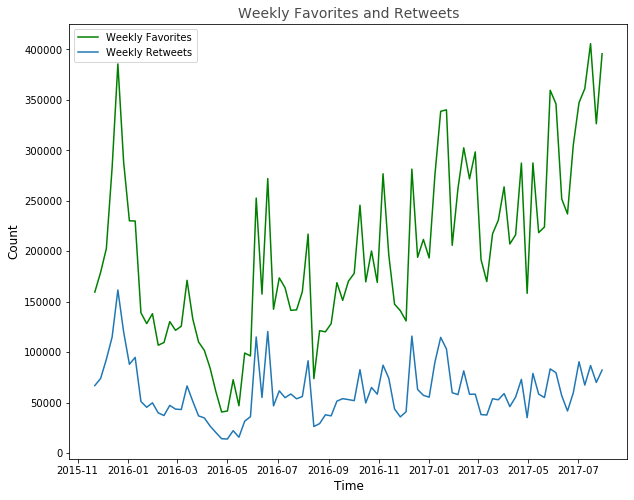

In [301]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(weekly_favorite, 'g-', label = 'Weekly Favorites')
ax.plot(weekly_retweet, label='Weekly Retweets')
ax.set_title('Weekly Favorites and Retweets',fontsize = 14, alpha = 0.7)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
ax.legend(loc='upper left')
plt.savefig(dirname / reports_folder / 'weekly_fav_retweet.png');

### Top 3 favorite count

1. https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
2. https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
3. https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg

In [15]:
# df['favorite_count'].nlargest(3)
top_3_fav = df[['tweet_id','favorite_count']].nlargest(3, 'favorite_count')
top_3_fav.iloc[2]

tweet_id          807106840509214720
favorite_count                123508
Name: 2016-12-09 06:17:20+00:00, dtype: int64

In [316]:
# tweet = api.get_status('807106840509214720', tweet_mode='extended')
# json_content = tweet._json
# json_content

{'created_at': 'Fri Dec 09 06:17:20 +0000 2016',
 'id': 807106840509214720,
 'id_str': '807106840509214720',
 'full_text': 'This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d',
 'truncated': False,
 'display_text_range': [0, 61],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 807106774843039744,
    'id_str': '807106774843039744',
    'indices': [62, 85],
    'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
    'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
    'url': 'https://t.co/DkBYaCAg2d',
    'display_url': 'pic.twitter.com/DkBYaCAg2d',
    'expanded_url': 'https://twitter.com/dog_rates/status/807106840509214720/video/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 544, 'h': 680, 'resize': 'fit'},
     'large': {'w':

## Read in image_long csv

In [67]:
df_image_long = pd.read_csv(dirname / processed_data_folder /'images_long.csv')

In [68]:
df_image_long.head()

,tweet_id,jpg_url,img_num,prediction_number,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [70]:
# mean and standard deviation for each prediction number
df_image_long.groupby('prediction_number')['confidence'].mean(), df_image_long.groupby('prediction_number')['confidence'].std()

(prediction_number
 1    0.594548
 2    0.134589
 3    0.060324
 Name: confidence, dtype: float64, prediction_number
 1    0.271174
 2    0.100666
 3    0.050906
 Name: confidence, dtype: float64)